# Analyzing Election Data using Benford’s Law
### Using Benford’s Law to analyze election data, can we identify possible fraud in the 2018 Russian and 2020 United States elections?
**Authors:** Dasha Chadiuk and Abitamim Bharmal

With the recent 2020 United States presidential election and the upcoming 2024 Russia presidential election, we were interested in analyzing past election data in these countries to see if we could identify potential fraud and how the data might differ in both countries. We felt that the Russia 2018 election was particularly interesting as Vladimir Putin received almost 75% of the total votes. After some research, we decided to ask the following question: Using Benford’s Law to analyze election data, can we identify possible fraud in the 2018 Russian and 2020 United States elections?

## Introduction: What is Benford’s Law? 

In a naturally occurring set of random numbers, the first leading digit usually follows the following distribution: 

![Benford's Distribution](Benford's_Law_Distribution.png)

In a set of many numbers, the first leading digit tends to be a one 30% of the time, a two 17.6% of the time, and so on. Benford’s law can also be applied to the second leading digit, and even pairs of leading digits. However, in this essay we will only be looking at the first leading digit. 

For Benford’s law to be applied, the set of data must be spread over a range of multiple orders of magnitude. Generally, the more orders of magnitude the data covers, the more accurate Benford’s law applies.

In this essay, we aim to compare the distribution of leading digits in election data to the values predicted by Benford’s law to find inconsistencies (large deviations) that might point to fraudulent data. Note that we cannot prove fraud using this law, but we can identify which data might need further analysis. 


## Methodology

For this essay, we collected the number of votes each presidential candidate received for each county or district. Before plotting and analyzing the data, we checked that the votes were spread over multiple orders of magnitude to satisfy the Benford’s law condition. Then, we iterated through all of the votes and got all of the leading digits. After finding all of the leading digits, we found the probability of each digit 1 to 9 and plotted these probabilities alongside the Benford’s law curve to see how far each country deviates from the curve. We repeated this process by looking at the vote distribution for each candidate and state/region. For any region that was inconsistent with Benford’s law, we created a 95% confidence interval for each digit to check how likely the probabilities would lie 1.96 standard deviations away from the mean probability. We believe that the regions that lay outside of this range should be flagged for further analysis.

**The following links were used to gather this data:** 

* [Link to Russian Data](http://www.vybory.izbirkom.ru/region/izbirkom?action=show&%20\%20root_a=null&vrn=100100084849062&region=0&global=true&%20\%20type=0&prver=0&pronetvd=null) 
* [Link to United States Data](https://uselectionatlas.org/RESULTS/) 

To collect this data, we wrote two python web-scraping scripts. We used Selenium and Beautiful Soup to automatically click through subpages on the websites linked above and process the data into a csv file. For the United States, we used Selenium; for Russia, we used both Selenium and Beautiful Soup. 

The US website has data all the way down to the town level, however, not all towns have enough data for us to use. Thus, we chose to only gather data on the county level and gathered over 12300 vote counts.
The Russia website contains data for each major region and the districts within each region. We chose to gather data on a district level and gathered over 22200 vote counts. 

Once the data had been gathered, we used the Pandas python library to process the data as a dataframe. This allowed us to sort through the data by candidate, region/state, or district/county and find all the leading digits to store in another dataframe. We used the matplotlib library to plot the distributions of leading digits and compare them with the predicted Benford’s curve. We also used this library to create pie charts for each country to see what percentage of the total votes was received by each candidate. To find the mean and standard deviation, we used the pandas built-in standard deviation and mean functions. With these numbers, we could create and plot the confidence interval described above.


## Results

Before we proceed, please run the following cell to ensure that the latest version of the code is run. 

In [1]:
%load_ext autoreload
%autoreload 2   

Before we analyze the data and generate the plots, we need to import some of the python libraries we will be using.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import data_analysis as helper

#This line ensures all figures are 15 by 7.5. 
plt.rcParams["figure.figsize"] = (15,7.5)

The data we collected is located in the the data folder. The files are titled *2018-Russia-election-data.csv* and *2020-us-election-data.csv* files.

In [3]:
us_data = pd.read_csv('data/2020-us-elections-data.csv')
russia_data = pd.read_csv('data/2018-Russia-election-data.csv')

First, we wanted to visualize how many votes each candidate in each country recieved. After generating pie charts for both Russia and US, we saw that Vladimir Putin recieved 77.4% of all the votes in Russia, Joe Biden recieved 51.1% of all votes in the US, and Donald Trump recieved 47.2% of all the votes in the US. This large gap in percentages between candidates, specifically in Russia, might be worth investigating!

([<matplotlib.patches.Wedge at 0x7f6bb78bc310>,
 [Text(0.10096171175016033, 1.0953568974359351, 'Donald J. Trump'),
  Text(-1.0881832851695314, 0.16080154811955794, 'Dr. Jo Jorgensen'),
  Text(-1.0942035442246516, 0.11277678753276886, 'Howie Hawkins'),
  Text(-0.05835520619254975, -1.0984510320948428, 'Joseph R. Biden Jr.'),
  Text(1.0999853196797116, -0.005683000010817142, 'Write-in')],
 [Text(0.055070024590996546, 0.5974673986014191, '47.1%'),
  Text(-0.5935545191833806, 0.08770993533794069, '1.2%'),
  Text(-0.5968382968498098, 0.06151461138151028, '0.2%'),
  Text(-0.03183011246866349, -0.5991551084153687, '51.4%'),
  Text(0.5999919925525699, -0.003099818187718441, '0.2%')])

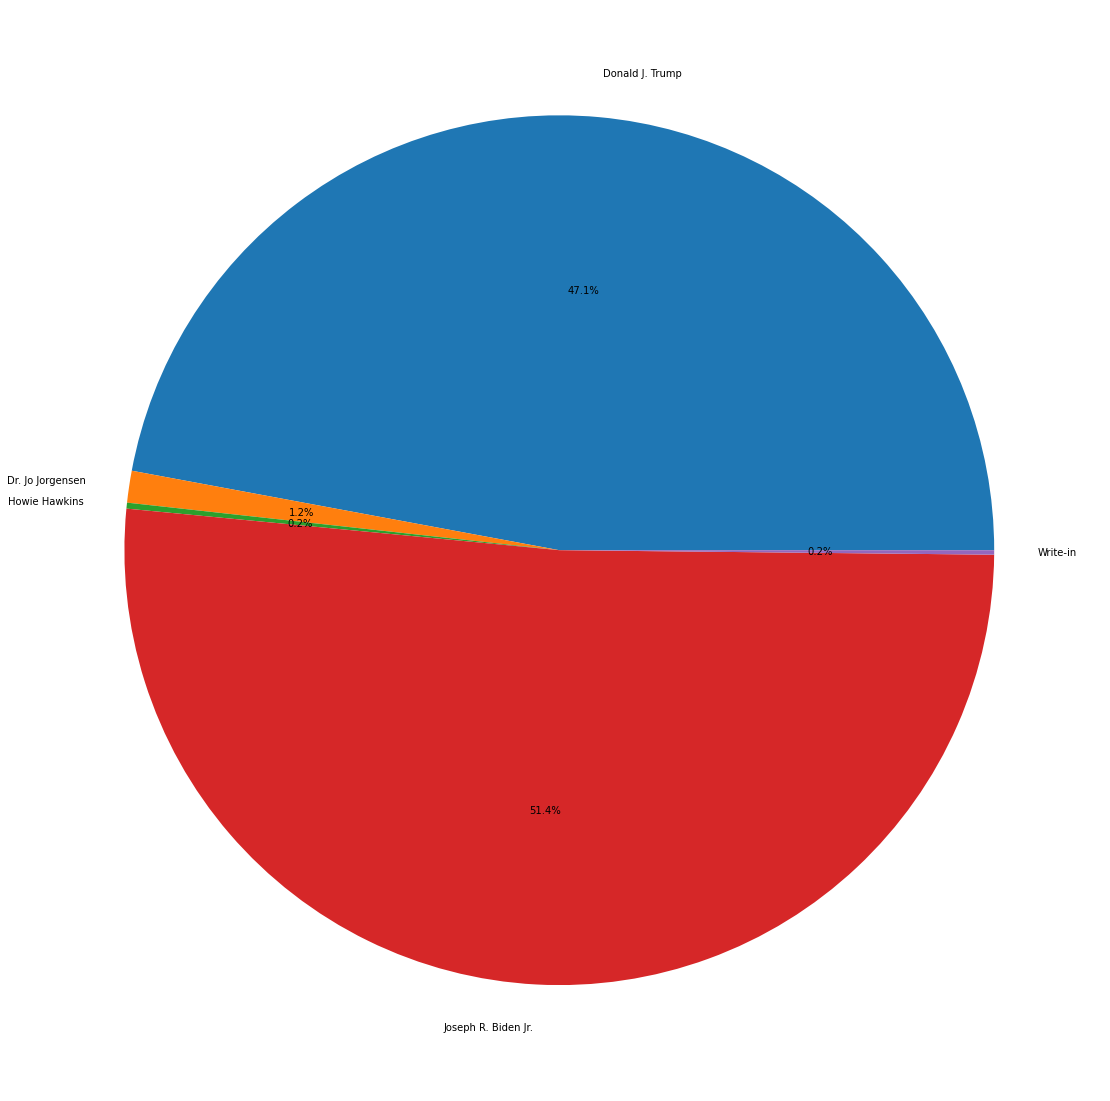

In [4]:
#Run this cell to generate the pie chart for the US
us_cand_vote_total = pd.DataFrame(helper.get_vote_by_category(us_data, "candidate", threshold=500)).apply(lambda cand: cand.sum())
us_total_votes = us_cand_vote_total.sum()
us_cand_vote_percentage = us_cand_vote_total.apply(lambda num_votes: num_votes / us_total_votes)

plt.figure(figsize=(20, 20))
plt.pie(us_cand_vote_percentage, normalize=True, labels=us_cand_vote_percentage.index, autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x7f6bb6ff0d60>,
 [Text(1.0997649092136572, 0.022740810501755193, 'Бабурин Сергей Николаевич'),
  Text(1.0065847179558602, 0.44360703959441555, 'Грудинин Павел Николаевич'),
  Text(0.6234827204322356, 0.9062390950088276, 'Жириновский Владимир Вольфович'),
  Text(-0.9945141161657919, -0.4700443306189046, 'Путин Владимир Владимирович'),
  Text(1.0755955657933296, -0.23042174126094817, 'Собчак Ксения Анатольевна'),
  Text(1.0898351060665241, -0.14919598380978055, 'Сурайкин Максим Александрович'),
  Text(1.0955015203779543, -0.0993801733224032, 'Титов Борис Юрьевич'),
  Text(1.0993931460265713, -0.036533689518010275, 'Явлинский Григорий Алексеевич')],
 [Text(0.5998717686619948, 0.01240407845550283, '0.7%'),
  Text(0.5490462097941056, 0.24196747614240846, '11.9%'),
  Text(0.3400814838721285, 0.49431223364117866, '5.7%'),
  Text(-0.542462245181341, -0.2563878167012207, '77.5%'),
  Text(0.5866884904327252, -0.12568458614233535, '1.7%'),
  Text(0.5944555123999222

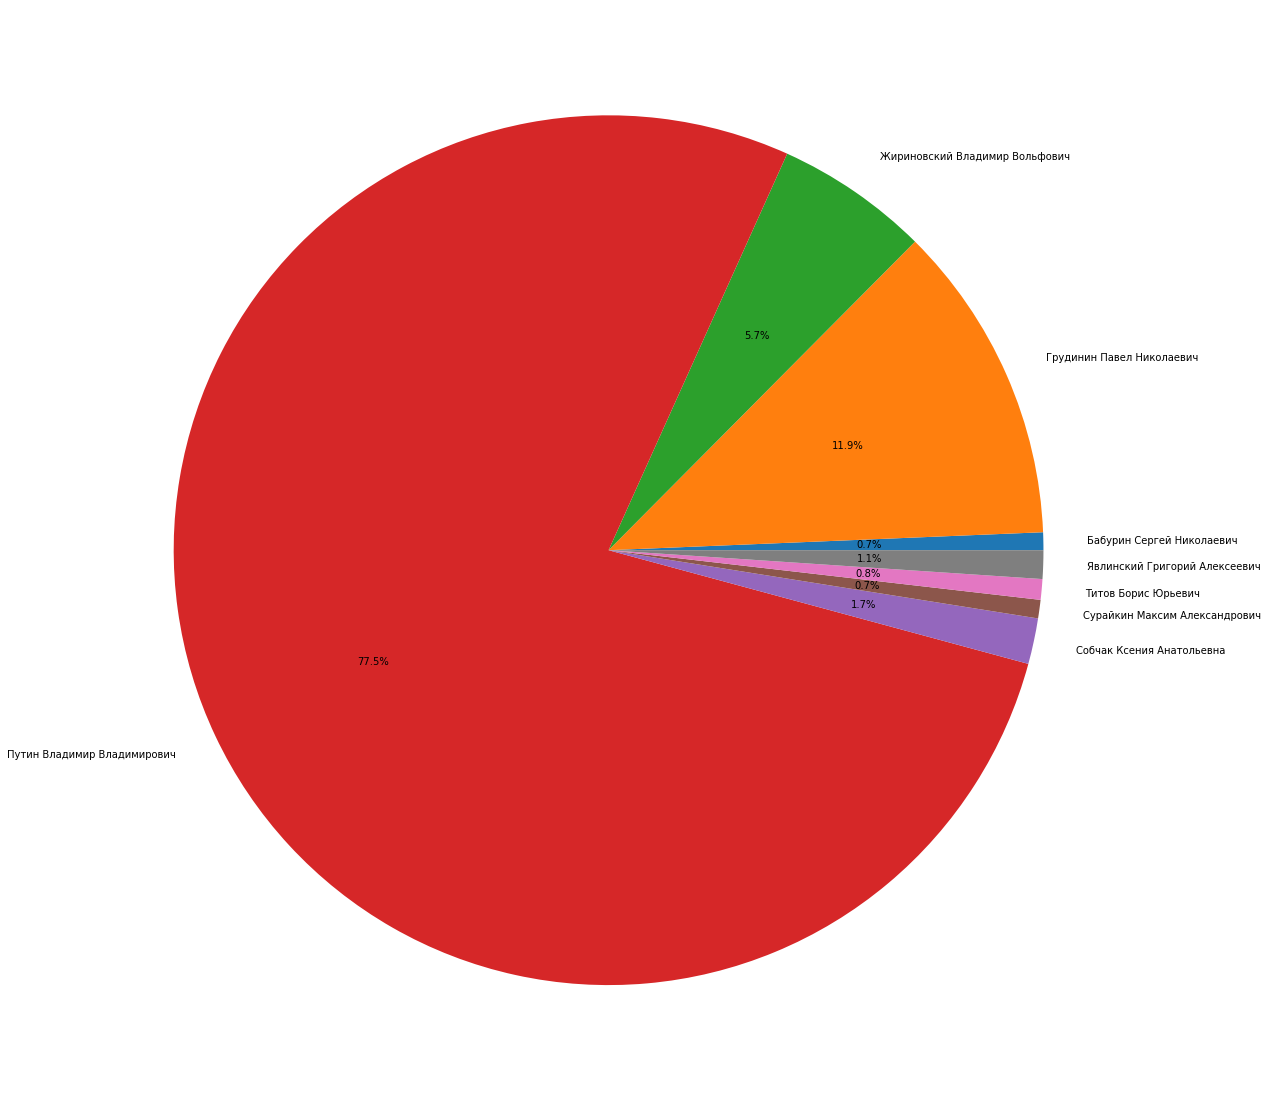

In [5]:
#Run this cell to generate the pie chart for Russia
russia_cand_vote_total = pd.DataFrame(helper.get_vote_by_category(russia_data, "candidate", threshold=500)).apply(lambda cand: cand.sum())
russia_total_votes = russia_cand_vote_total.sum()
russia_cand_vote_percentage = russia_cand_vote_total.apply(lambda num_votes: num_votes / russia_total_votes)

plt.figure(figsize=(20, 20))
plt.pie(russia_cand_vote_percentage, normalize=True, labels=russia_cand_vote_percentage.index, autopct="%1.1f%%")

Next, we found all the leadings digits for both countries and found the relative frequencies for each digit. By plotting the frequencies of each digit for each country against the Benford's law curve, we can see how much each country deviates from the ideal curve. 

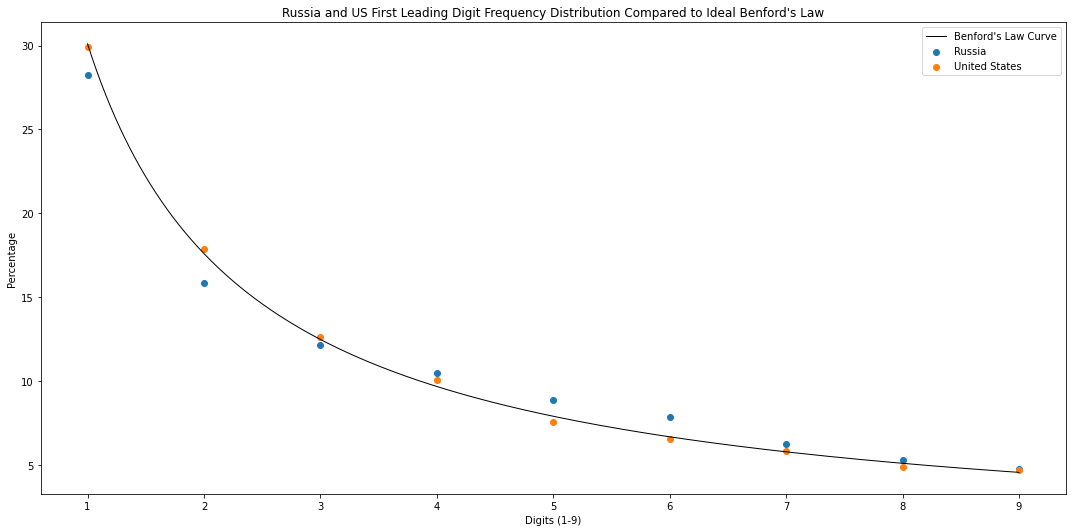

In [4]:

leading_digits_us = helper.find_all_leading_digits(us_data)
leading_digits_russia = helper.find_all_leading_digits(russia_data)

us_percentages = helper.data_to_percentage(leading_digits_us)
russia_percentages = helper.data_to_percentage(leading_digits_russia)

helper.plot_ideal_benfords_law_curve(1000)

plt.scatter(russia_percentages.index, russia_percentages, label="Russia")
plt.scatter(us_percentages.index, us_percentages, label="United States")

helper.plot_labels("Digits (1-9)", "Percentage", "Russia and US First Leading Digit Frequency Distribution Compared to Ideal Benford's Law")

We saw that both countries follow the distribution very closely. To check how well each country follows the distribution, we calculated the $R^2$ values.

In [8]:
r2_us = np.corrcoef(us_percentages[0], helper.get_theoretical_benford_law_values())[0, 1] ** 2
r2_russia = np.corrcoef(russia_percentages[0], helper.get_theoretical_benford_law_values())[0, 1] ** 2

print(f'R^2 for Russia: {r2_russia}\nR^2 for US: {r2_us}')

R^2 for Russia: 0.9933100709831393
R^2 for US: 0.9990653700784613


Both $R^2$ values are very close to 1, which means that both countries' first leading digit distributions follow the Benford's Law distribution almost perfectly. 

While this tells us that nationally, the countries follow the predicted distribution, it would be useful to investigate the distributions of leading digits in each state/region. In addition, we can use standard deviation from the national mean, since the national mean almost exactly approximates the ideal Benford's curve for both countries.

### Analyzing the United States Leading Digit Distributions by State

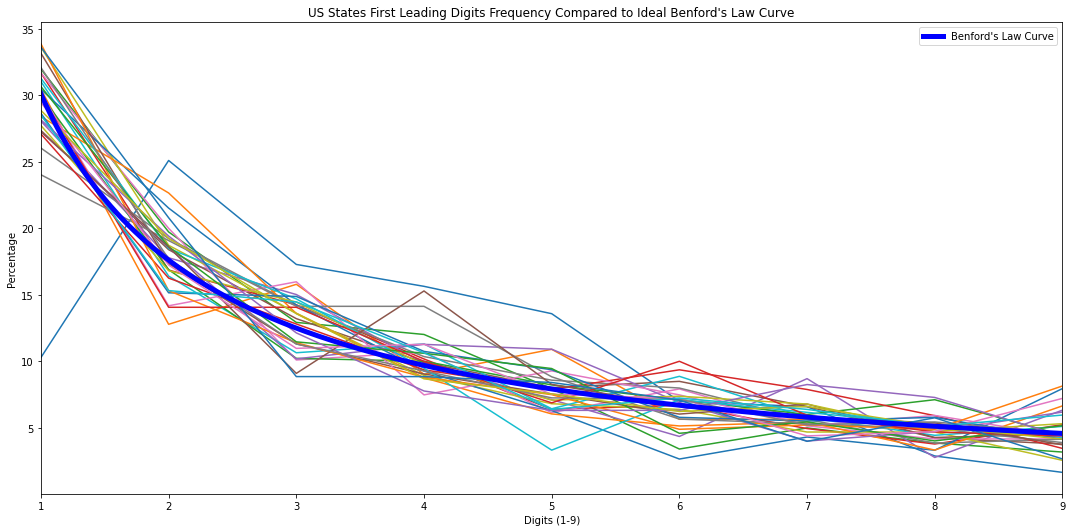

In [9]:
#US States Leading Digit Distribution Plot
leading_digit_states = helper.find_all_leading_digits(us_data, "state", threshold=200)
state_percentages = helper.data_to_percentage(leading_digit_states)

plt.xlim([1, 9])
plt.plot(state_percentages.index, state_percentages)
helper.plot_ideal_benfords_law_curve(1000, color="blue", thickness=5)

helper.plot_labels("Digits (1-9)", "Percentage", "US States First Leading Digits Frequency Compared to Ideal Benford's Law Curve")

The thick blue line in the figure above represents the Benford's Law distribution, while the thinner lines around it are the distributions of leading digit frequencies for each state. This graph is very messy and cannot tell us anything about the actual values. However, we can see that there are some states that do not follow Benford's Law closely and we want to see which states differ and by how much.

To investigate these states, we set up a 95% confidence interval which will tell us where most of the election data would lie 95% of the time. We can do this by finding which states lie 1.96 standard deviations away from the country mean for each digit. 

The green bar graphs in the figures below show all of the states that lie outside the expected frequency range for each digit. Given this information, states such as Alaska, Alabama, and Mississippi (among others) should be investigated further. 


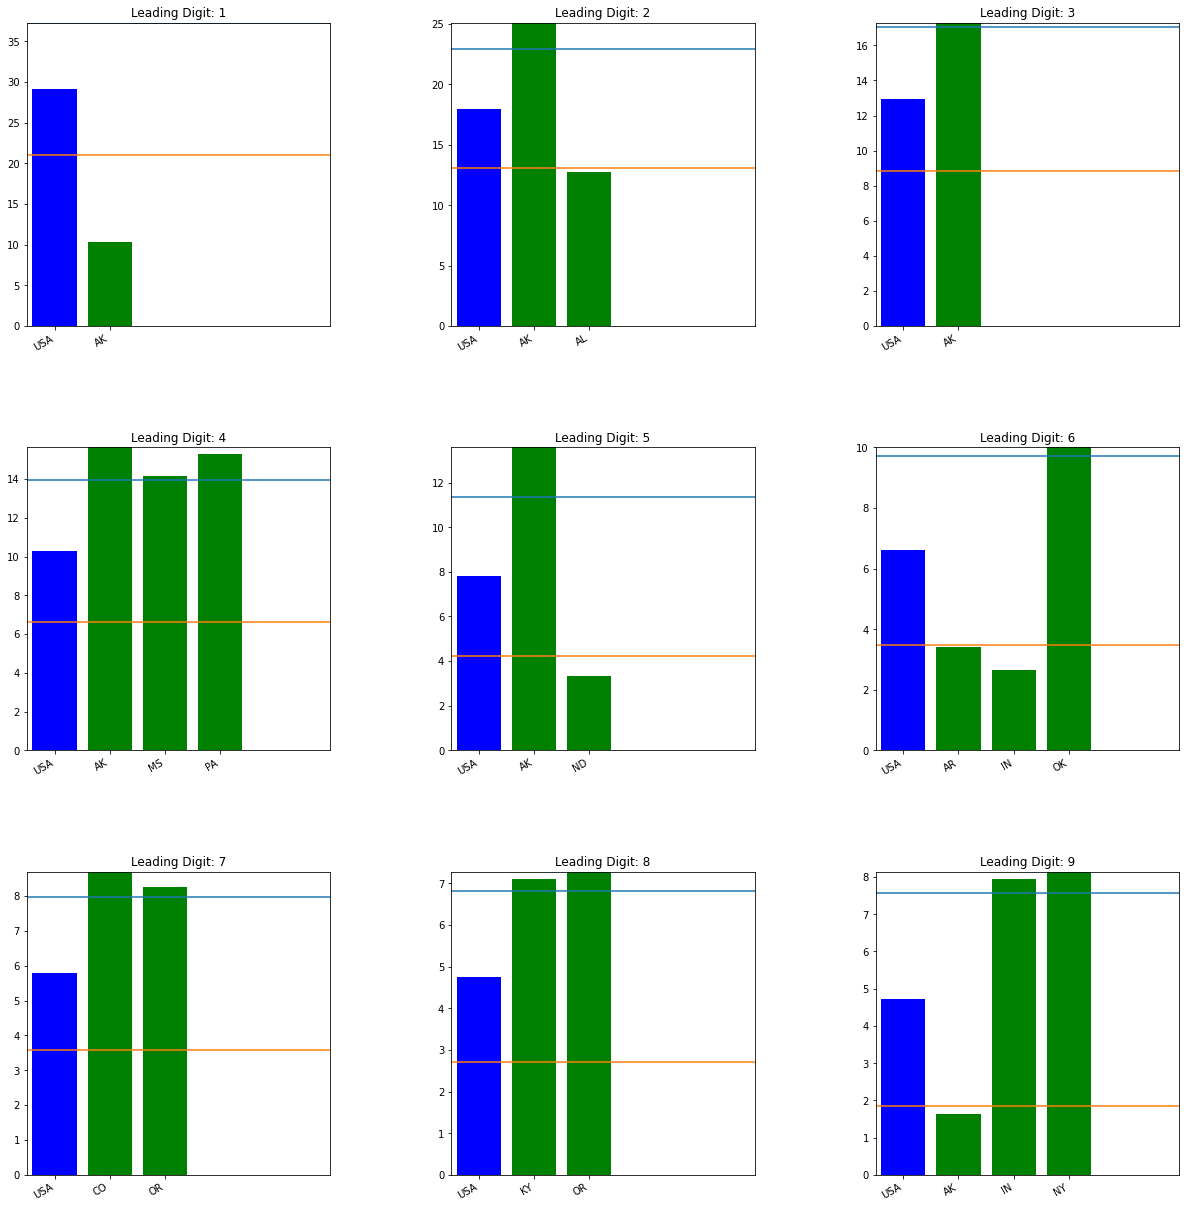

In [11]:
#Finding and plotting which US states are more than 1.96 standard deviations away from the country mean.
us_means, us_std_devs, us_max_vals, us_min_vals = helper.find_std_dev_range(state_percentages)

us_values_outside_std_dev = helper.find_values_outside_range(state_percentages, us_min_vals, us_max_vals)

helper.plot_subplots_bar("USA", us_values_outside_std_dev, us_means, us_min_vals, us_max_vals, ["blue", "green"])

### Analyzing the Russia Leading Digit Distributions by Region

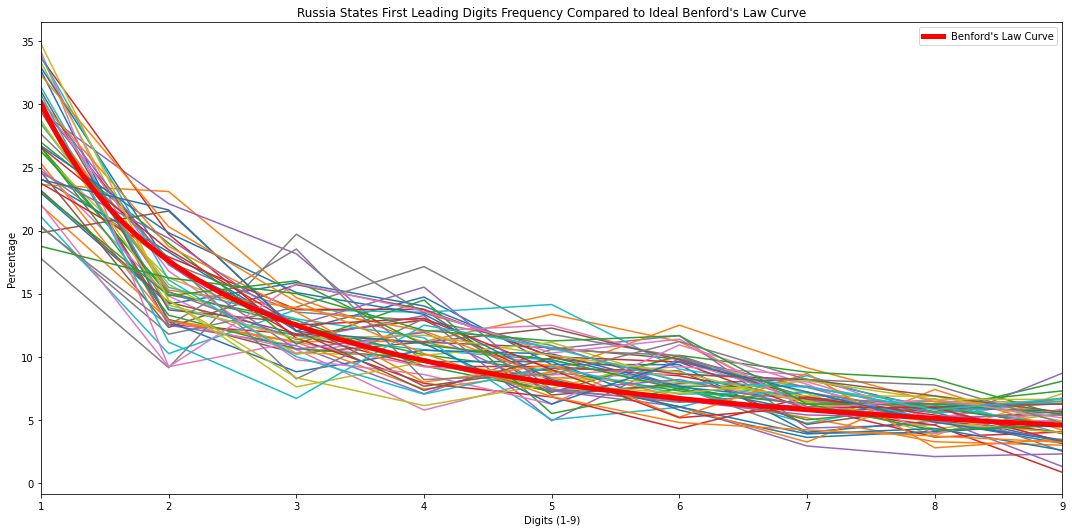

In [12]:
#Russia Regions Leading Digit Distribution Plot
leading_digit_regions = helper.find_all_leading_digits(russia_data, "region", threshold=200)
region_percentages = helper.data_to_percentage(leading_digit_regions)
plt.xlim([1, 9])
plt.plot(region_percentages.index, region_percentages)
helper.plot_ideal_benfords_law_curve(1000, color="red", thickness=5)

helper.plot_labels("Digits (1-9)", "Percentage", "Russia States First Leading Digits Frequency Compared to Ideal Benford's Law Curve")

The thick red line in the figure above represents the Benford's Law distribution, while the thinner lines around it are the distributions of leading digit frequencies for each region. Like we say in the US, this graph is very messy and cannot tell us anything about the actual values. However, similar to the US, we can see that there are some regions that do not follow Benford's Law closely and we want to see which regions differ and by how much.

To investigate these regions, we follow the same procedure as for the US states. As a reminder, we set up a 95% confidence interval which will tell us where most of the election data would lie 95% of the time. We can do this by finding which states lie 1.96 standard deviations away from the country mean for each digit. 

The orange bar graphs in the figures below show all of the regions that lie outside the expected frequency range for each digit. Given this information, regions such as the Pskov Oblast, Kemerovo Oblast, and Krasnodar Krai (among others)might need to be investigated further.


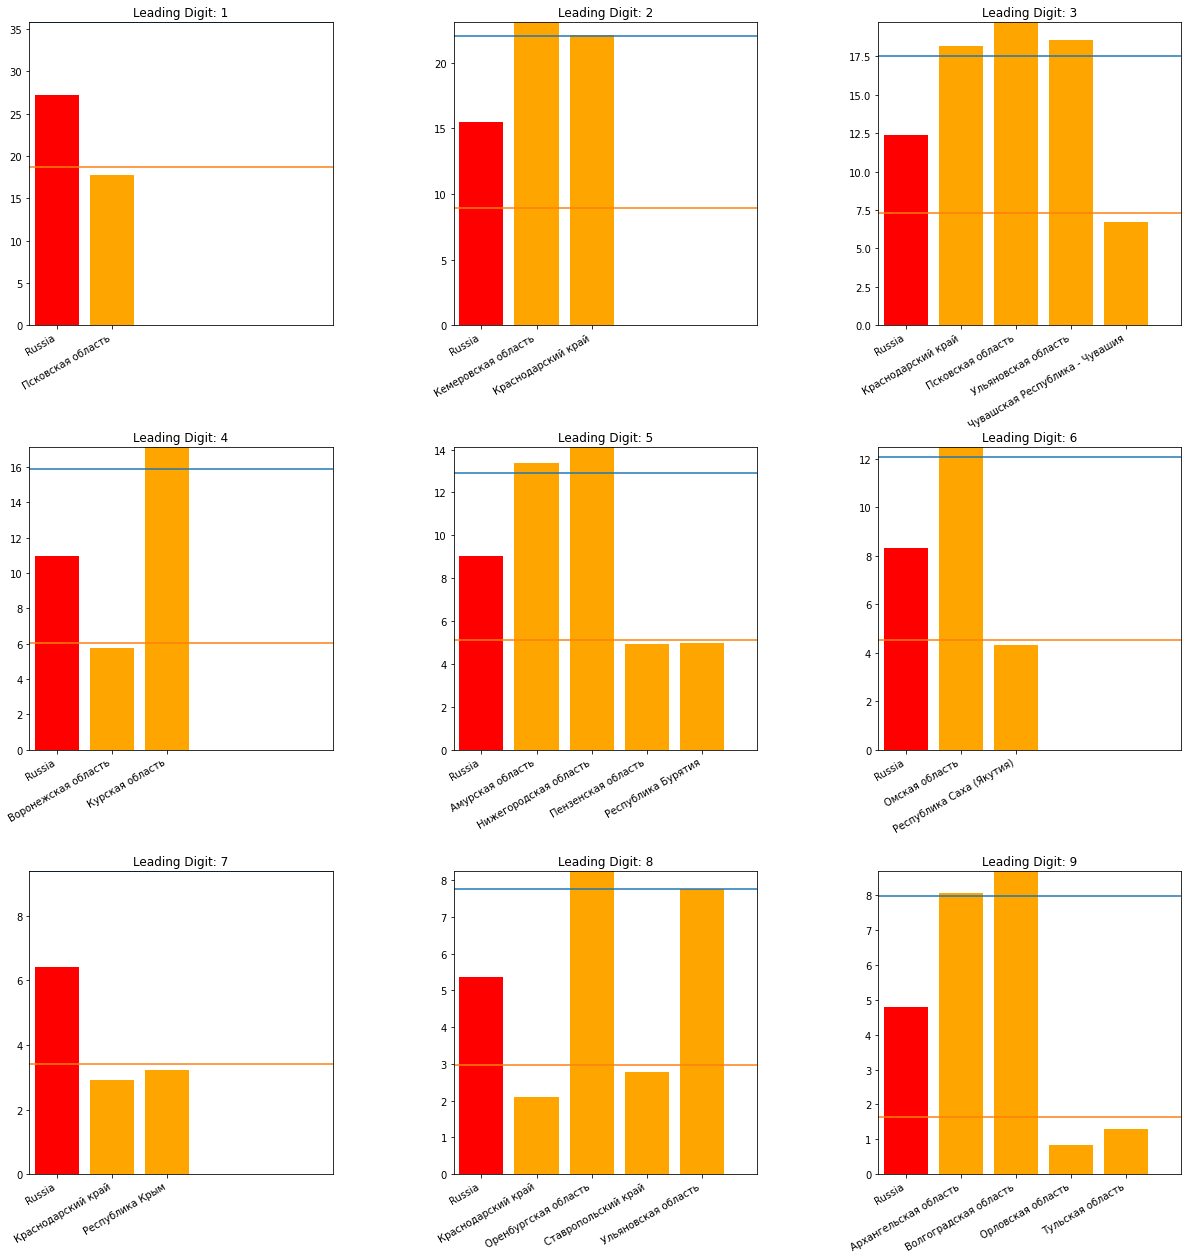

In [13]:
#Finding and plotting which Russian regions are more than 1.96 standard deviations away from the country mean.
russia_means, russia_std_devs, russia_max_vals, russia_min_vals = helper.find_std_dev_range(region_percentages)

russia_values_outside_std_dev = helper.find_values_outside_range(region_percentages, russia_min_vals, russia_max_vals)

helper.plot_subplots_bar("Russia", russia_values_outside_std_dev, russia_means, russia_min_vals, russia_max_vals, ["red", "orange"])

### Leading Digit Distributions for Each Candidate in US and Russia

Lastly, we wanted to see how much the leading digit distribution for each candidate differs from the expected Benford's Law distribution. For the most part, the distributions for each candidate followed the expected distibution quite closely, and we did not see any outstanding outliers. However, it is important to note that some candidates did not recieve enough votes that spread over multiple orders of magnitude (Candidates other than Vladimir Putin, Pavel Grudinin, Joe Biden, and Donald Trump) so we cannot make any conclusions regarding their fit to the Benford's Law distribution.

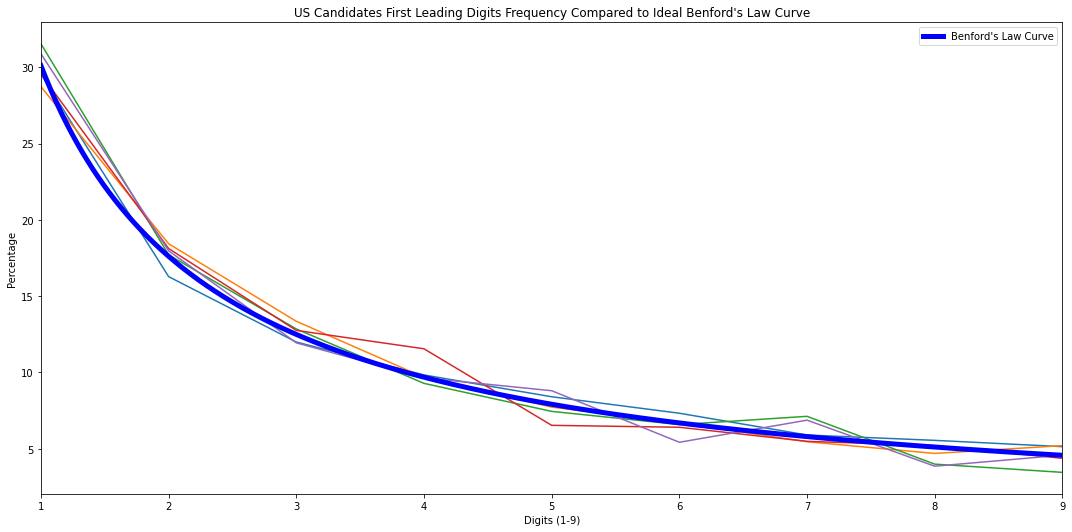

In [14]:
#Leading digit distributions for each candidate in the US
leading_digit_us_cands = helper.find_all_leading_digits(us_data, "candidate", threshold=500)
us_cand_percentages = helper.data_to_percentage(leading_digit_us_cands)
plt.xlim([1, 9])
plt.plot(us_cand_percentages.index, us_cand_percentages)
helper.plot_ideal_benfords_law_curve(1000, color="blue", thickness=5)

helper.plot_labels("Digits (1-9)", "Percentage", "US Candidates First Leading Digits Frequency Compared to Ideal Benford's Law Curve")

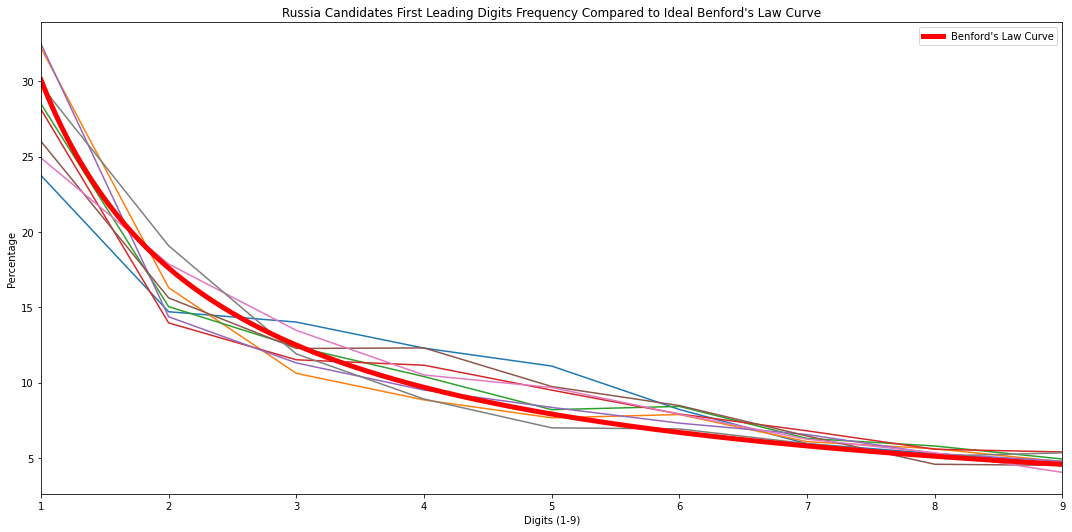

In [15]:
#Leading digit distributions for each candidate in Russia
leading_digit_russia_cands = helper.find_all_leading_digits(russia_data, "candidate", threshold=200)
russia_cand_percentages = helper.data_to_percentage(leading_digit_russia_cands)
plt.xlim([1, 9])
plt.plot(russia_cand_percentages.index, russia_cand_percentages)
helper.plot_ideal_benfords_law_curve(1000, color="red", thickness=5)

helper.plot_labels("Digits (1-9)", "Percentage", "Russia Candidates First Leading Digits Frequency Compared to Ideal Benford's Law Curve")

## Conclusion and Interpretation

In conclusion, on a national level, both Russia and the US leading digits distributions follow Benford’s law closely. However, both countries have states/regions that have leading digits that deviate an unexpected amount away from Benford’s Law predicted values. It would be useful to investigate these states/regions further to see if there was any fraud on a state or regional level. 

Some of the US states worth investigating further: 
* Alaska
* Alabama 
* Mississippi 

Some of the Russian regions worth investigating further:
* Pskov Oblast 
* Kemerovo Oblast
* Krasnodar Krai

To see more states and regions we flagged for further analysis, please see the bar graphs above.

To be more confident in our data, it would be useful to run a similar analysis on the second leading digit and the combination of first and second leading digits. Since Benford's law can be applied to different combinations of digits, the data we recieve by running further analysis might give us insights into our conclusions that we did not see before. One challenge we anticipate is that to gather the required second leading digits, we would need to account for some vote counts that might be less than 10. Moreover, it might be interesting to look into other data mining techniques that could identify fraud more accurately than our chosen method.

We must emphasise many times that we **cannot** use the contents of this essay to prove fraud, only point in the direction of possible fraudulent data. This project’s purpose was to explore various python libraries and investigate interesting trends in election data. Using these findings in a way that was not intended might result in unwanted consequences. This data cannot be used to accuse any candidate or any specific region of fraud.

### Closing Remarks: Challenges We Faced

While working on this project, we ran into many technical difficulties. The main struggle we had was the lack of planning. When working on our analysis code and visualizations, we wrote most of our work in one jupyter notebook. This caused many issues later in the project and we had to spend many hours moving and refactoring the code. The second challenge we faced was determining which visualizations we wanted to display to tell the story. When we started the project, we had one visualization in mind (the one where we compare the country leading digit distribution to benford's law distribution). After gathering and processing all of our data, we spent many hours trying to think of valuable information to display. Another challenge we faced was writing the unit tests. A lot of our functions were very specific in the inputs and outputs, which made writing test cases very difficult. The last challenge we faced was writing the docstrings for each function we wrote. For some of the functions, we did not write the docstrings right away which made it much harder for us to understand some of the code further into the project.

To avoid these mistakes in the future, we should:
 
1.Plan ahead of time how we will organize our code. 

2.Plan ahead of time which visualizations would benefit the story.

3.Organize and document our code (write docstrings) as we write the code to avoid any future confusions.

